In [4]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))



df = pd.read_csv(os.path.join(os.getcwd(), "../../data/total_4am.csv"), index_col=0)


In [5]:
import pandas as pd
from performance import get_performance

def various_ma(interval_list, df):

    original_df = df.copy()  # Make a copy of the original DataFrame

    for interval in interval_list:
        df = original_df.copy()  # Create a fresh copy for each interval

        df[f"{interval}_ma"] = df['close'].rolling(window=interval).mean()

        # Implement RSI strategy for long positions only
        df['signal'] = 0  # Default to no position
        for i in range(200, len(df)):
            # Buy condition
            if df['close'].iloc[i] >= df[f'{interval}_ma'].iloc[i]:
                df.loc[i, 'signal'] = 1
            # Sell condition
            elif df['close'].iloc[i] < df[f'{interval}_ma'].iloc[i]:
                df.loc[i, 'signal'] = -1

        # Manage positions
        df['position'] = 0
        holding_position = False

        for i in range(1, len(df)):
            if df['signal'].iloc[i] == 1 and not holding_position:
                df.loc[i, 'position'] = 1
                holding_position = True
            elif df['signal'].iloc[i] == -1 and holding_position:
                df.loc[i, 'position'] = 0
                holding_position = False
            else:
                df.loc[i, 'position'] = df['position'].iloc[i-1]

        # Calculate the strategy returns (only when in a long position)
        df['strategy_returns'] = df['position'].shift(1) * df['close'].pct_change()

        # Calculate the cumulative returns
        df['cumulative_returns'] = (1 + df['strategy_returns']).cumprod()

        # Calculate the benchmark cumulative returns (buy and hold strategy)
        df['benchmark_returns'] = (1 + df['close'].pct_change()).cumprod()

        # Save the results to a CSV file
        df.to_csv(f"../../results/ma/ma{(interval)}.csv")

        # Get performance metrics and plot the results
        get_performance(df=df, title=f"ma_{interval}")

        
    df = original_df.copy()  # Create a fresh copy for each interval


======Investment Summary======
Strategy        : ma_5
total_return    : 150.28
cagr            : 38.11
mdd             : 44.87
investing_days  : 1037


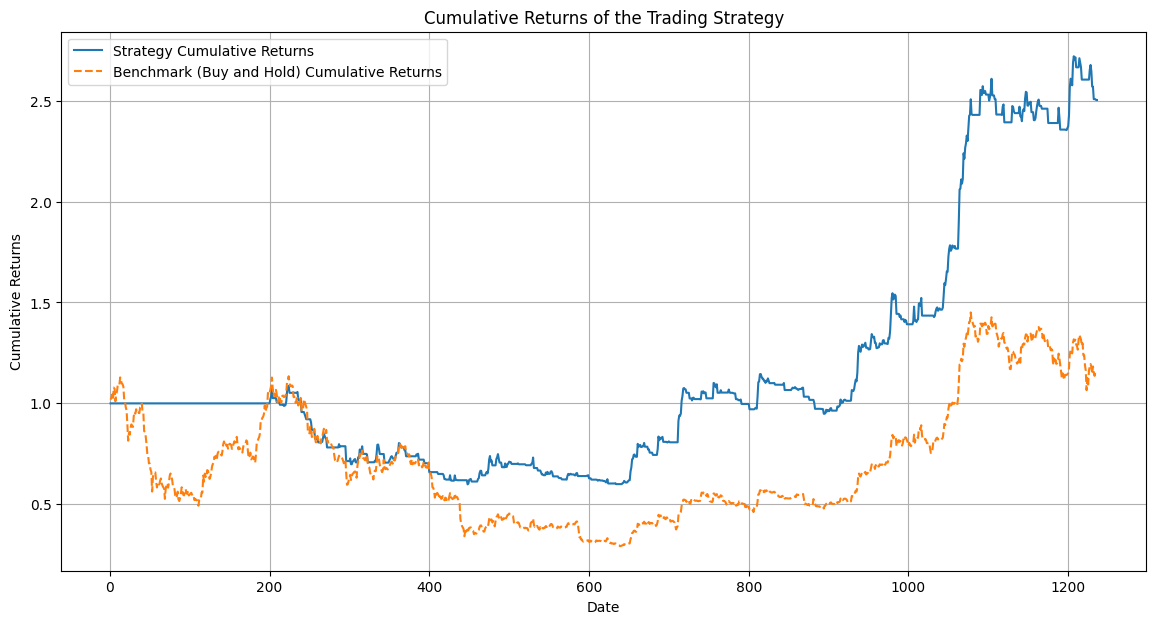

======Investment Summary======
Strategy        : ma_10
total_return    : 87.0
cagr            : 24.65
mdd             : 38.32
investing_days  : 1037


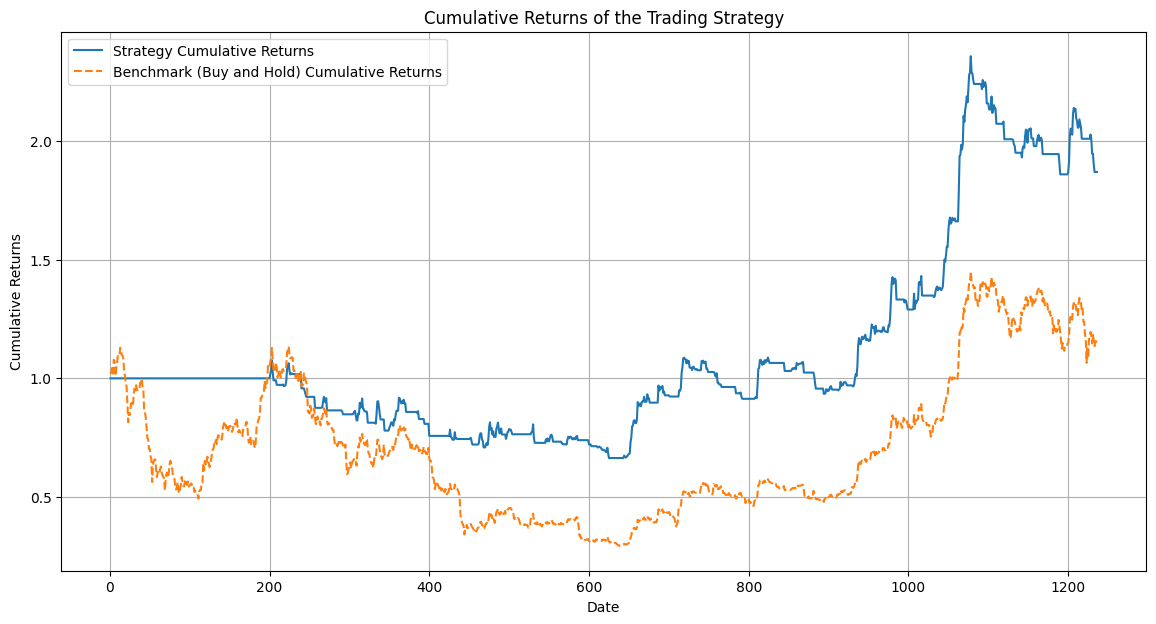

======Investment Summary======
Strategy        : ma_20
total_return    : 104.39
cagr            : 28.61
mdd             : 43.81
investing_days  : 1037


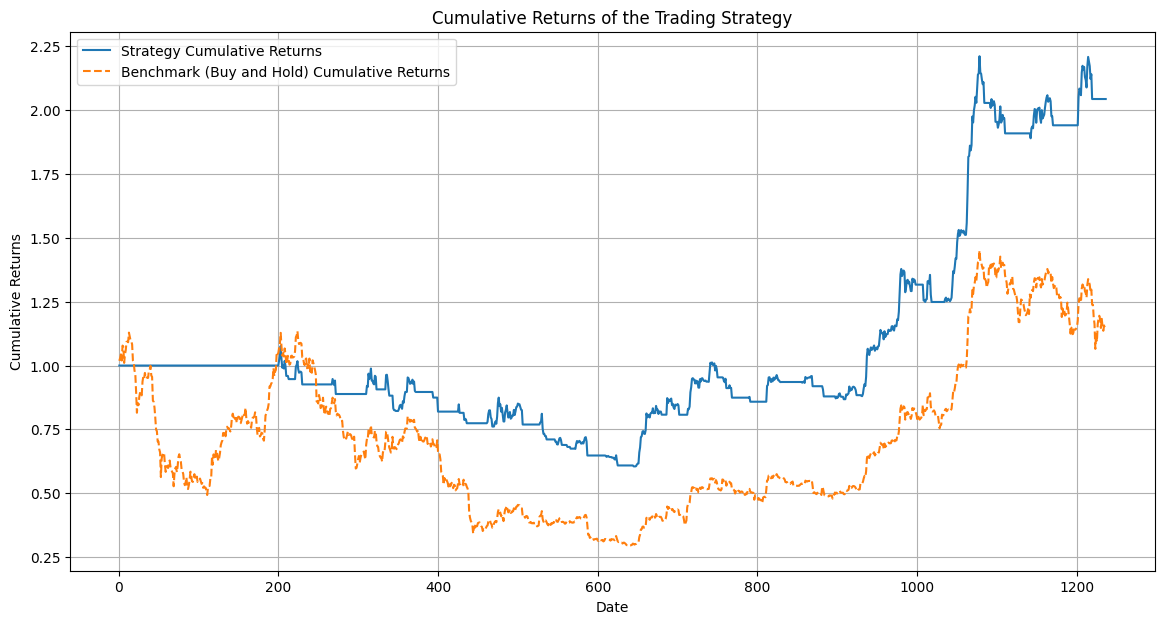

======Investment Summary======
Strategy        : ma_50
total_return    : 109.17
cagr            : 29.66
mdd             : 42.29
investing_days  : 1037


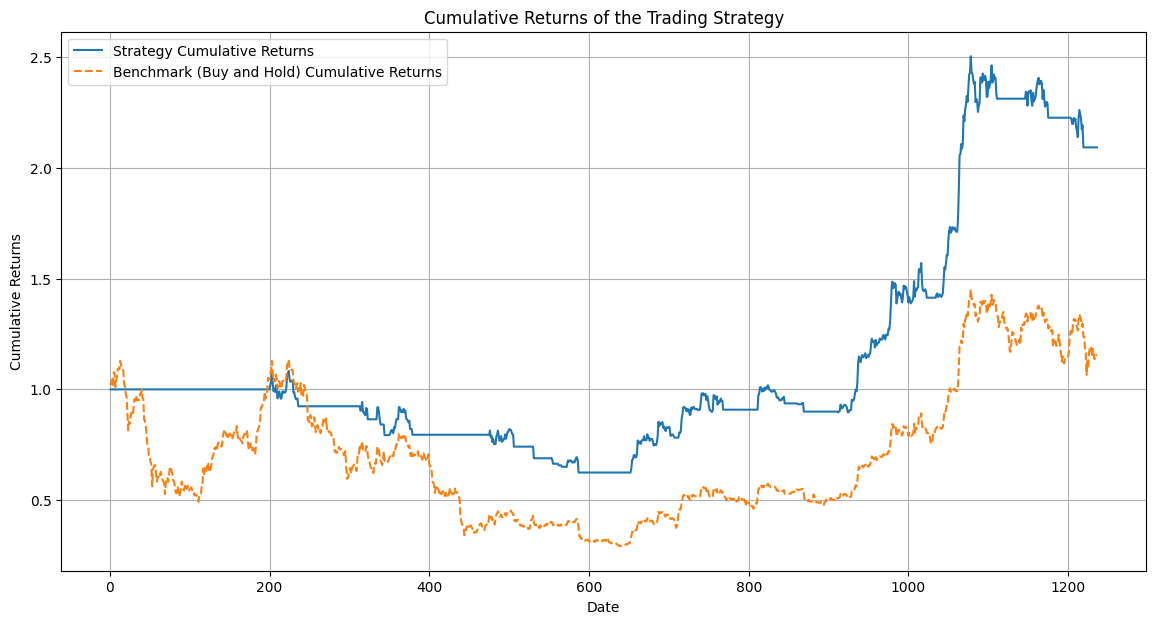

======Investment Summary======
Strategy        : ma_90
total_return    : 56.29
cagr            : 17.02
mdd             : 44.25
investing_days  : 1037


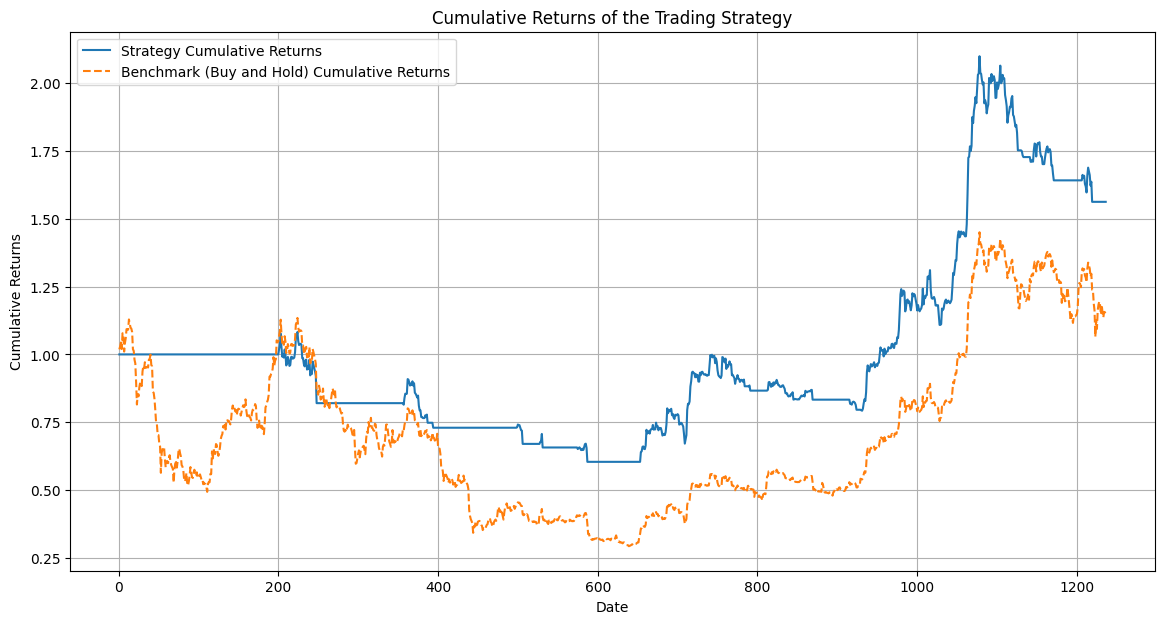

======Investment Summary======
Strategy        : ma_120
total_return    : 66.8
cagr            : 19.73
mdd             : 42.49
investing_days  : 1037


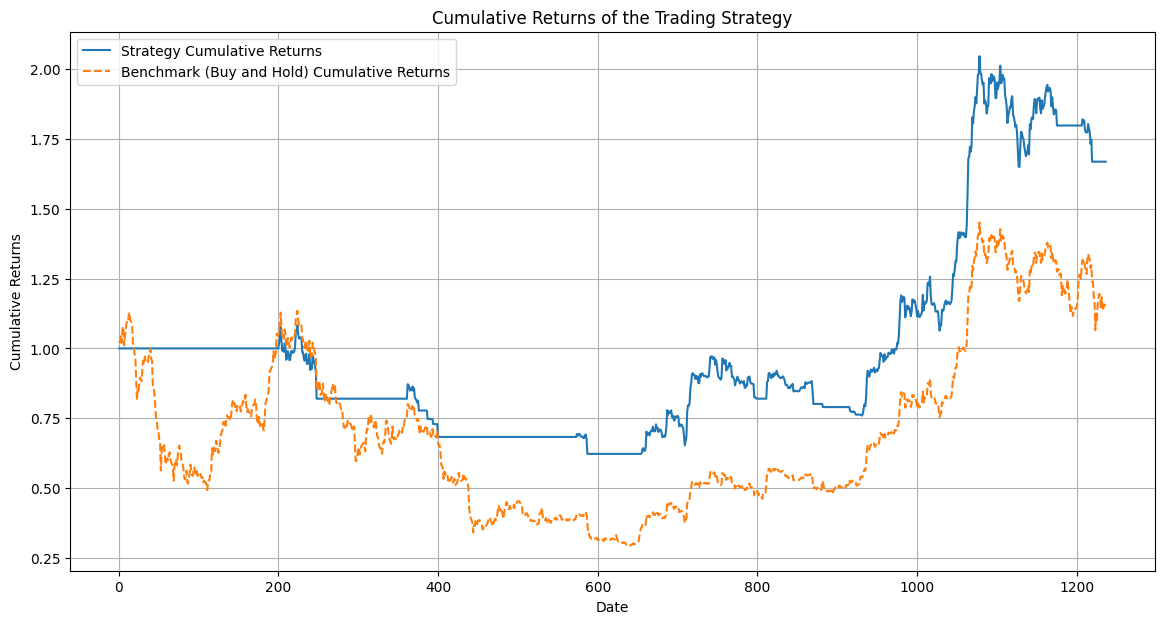

======Investment Summary======
Strategy        : ma_200
total_return    : 100.91
cagr            : 27.83
mdd             : 29.39
investing_days  : 1037


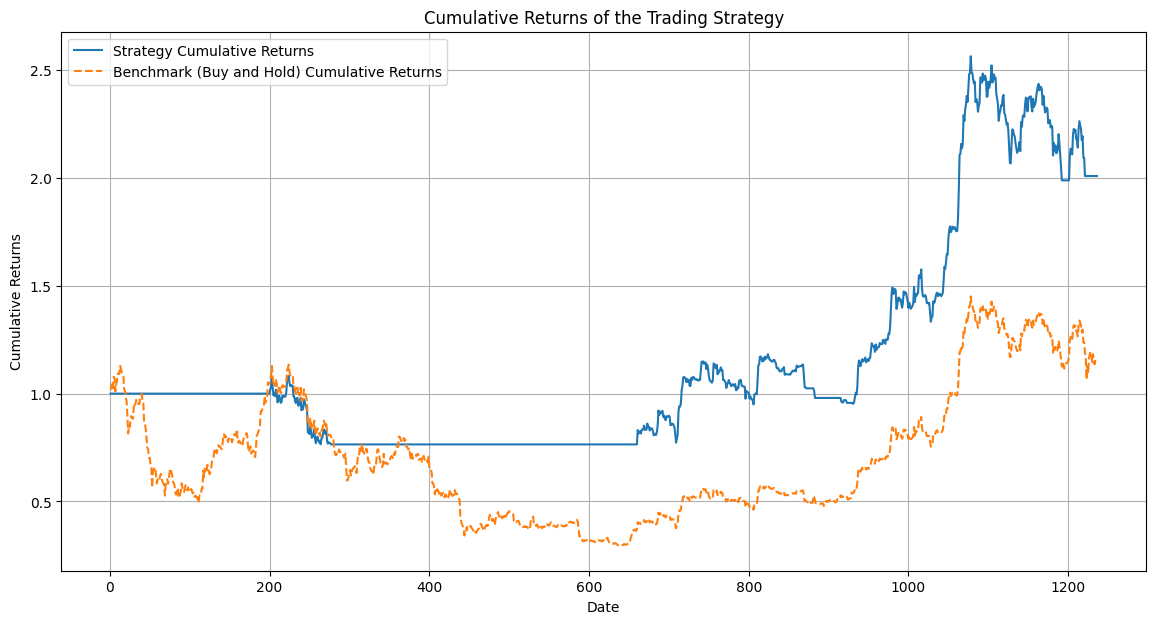

In [6]:
interval_list = [5, 10, 20, 50, 90, 120, 200]
various_ma(interval_list=interval_list, df=df)